# Indian Agriculture Crop Production

In [1]:
# Importing all the required libraries.

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as mplpl
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Reading Data From Csv File.
rawdata = pd.read_csv("C:/Users/piyus/AppData/Local/Temp/Rar$DIa10400.11331/India Agriculture Crop Production.csv")
rawdata.head(5)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [3]:
# Understanding Data Type and Compnents of raw data such as total columns, rows, and null values

rawdata.info()
rawdata.describe()
print(f'The data set contains {rawdata.shape[1]} columns and {rawdata.shape[0]} rows')

print('\n\n')

for column in rawdata.columns:
    data_type = type(column)
    print(f"{column} >> {data_type}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB
The data set contains 10 columns and 345407 rows



State >> <class 'str'>
District >> <class 'str'>
Crop >> <class 'str'>
Year >> <class 'str'>
Season >> <class 'str'>
Area >> <class 'str'>
Area Units >> <class 'str'>
Production >> <class 'str'>
Production Un

In [4]:
# checking null values in the data. 
rawdata.isna().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [5]:
# removing rows where area OR crop is null
print(rawdata.shape[0])
rawdata = rawdata.dropna(subset=['Area','Crop'])
print(rawdata.shape[0])

345407
345374


In [6]:
#Checking for Duplicates - If found, just remove.
print('The duplicate values in the data is',rawdata.duplicated().sum())

The duplicate values in the data is 0


In [7]:
# Counting number of rows per year to check if data all the years is completely present.
rawdata.value_counts('Year')

Year
2019-20    19264
2018-19    18301
2017-18    18008
2016-17    17418
2015-16    16339
2013-14    16178
2011-12    16132
2014-15    15587
2009-10    15341
2012-13    15279
2008-09    15150
2010-11    14889
2007-08    14681
2006-07    14678
2003-04    14662
2002-03    14182
2004-05    14151
2005-06    14063
2000-01    13593
2001-02    13307
1999-00    13013
1998-99    12290
1997-98     8549
2020-21      319
dtype: int64

In [8]:
# Changing all values of district column to proper case
rawdata['District'] = rawdata['District'].str.title()
# Round down all values of yeild column to 2 digits after decimal for ease of calculation
rawdata['Yield'] = rawdata['Yield'].round(2)

rawdata.head(10)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,Nicobars,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.64
1,Andaman and Nicobar Islands,Nicobars,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.66
2,Andaman and Nicobar Islands,Nicobars,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.21
3,Andaman and Nicobar Islands,North And Middle Andaman,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.69
4,Andaman and Nicobar Islands,South Andamans,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.70
5,Andaman and Nicobar Islands,South Andamans,Arecanut,2003-04,Whole Year,3118.0,Hectare,5182.0,Tonnes,1.66
6,Andaman and Nicobar Islands,Nicobars,Banana,2002-03,Whole Year,213.0,Hectare,1278.0,Tonnes,6.00
7,Andaman and Nicobar Islands,Nicobars,Banana,2003-04,Whole Year,266.0,Hectare,1763.0,Tonnes,6.63
8,Andaman and Nicobar Islands,South Andamans,Banana,2002-03,Whole Year,1524.0,Hectare,10882.0,Tonnes,7.14
9,Andaman and Nicobar Islands,South Andamans,Banana,2003-04,Whole Year,1530.0,Hectare,11558.0,Tonnes,7.55


In [22]:
# Removing rows where year is 1997-98 and 2021-22 as data seems to be incomplete for the following year.
rawdata = rawdata.drop(rawdata[(rawdata['Year'] == '1997-98') | (rawdata['Year'] == '2020-21')].index)
print(f"The number of rows remaining are {rawdata.shape[0]}.")

The number of rows remaining are 336506.


In [9]:
# Adding 1 new column where all the production values converted to tonne.
"""
1 Tonne = 1 Tonne.
Considering 1 Kg = 10 coconuts then 1 Tonne = 10,000 Cocunts or 1 Nut = 0.0001 Tonne
1 Bale = 0.22 Tonne or 1 Tonne = 4.6 Bales
"""
rawdata['Production in Tonnes'] = rawdata.apply(lambda row: 
                                                       row['Production'] if row['Production Units'] == 'Tonnes' 
                                                  else row['Production'] * 0.0001 if row['Production Units'] == 'Nuts'
                                                  else row['Production'] * 0.22 if row['Production Units'] == 'Bales'
                                                  else None, axis=1)

# since data is present in suitable format for analysis, changing name of table to rawdatav2
rawdatav2 = rawdata
rawdatav2 


,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield,Production in Tonnes
0,Andaman and Nicobar Islands,Nicobars,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.64,2061.0
1,Andaman and Nicobar Islands,Nicobars,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.66,2083.0
2,Andaman and Nicobar Islands,Nicobars,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.21,1525.0
3,Andaman and Nicobar Islands,North And Middle Andaman,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.69,5239.0
4,Andaman and Nicobar Islands,South Andamans,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.70,5267.0
...,...,...,...,...,...,...,...,...,...,...,...
345370,West Bengal,Purba Bardhaman,Wheat,2000-01,Rabi,6310.0,Hectare,15280.0,Tonnes,2.42,15280.0
345371,West Bengal,Purulia,Wheat,1997-98,Rabi,1895.0,Hectare,2760.0,Tonnes,1.46,2760.0
345372,West Bengal,Purulia,Wheat,1998-99,Rabi,3736.0,Hectare,5530.0,Tonnes,1.48,5530.0
345373,West Bengal,Purulia,Wheat,1999-00,Rabi,2752.0,Hectare,6928.0,Tonnes,2.52,6928.0


In [10]:
# Data Analysis

In [11]:
# To find unique value of suitable columns

# Unique States
unique_states = rawdatav2['State'].unique()
print(f"Number of Unique States = {len(unique_states)}") 
print(f"Names of States -> {unique_states}")

print('\n')

# Unique Districts
unique_districts = rawdatav2['District'].unique()
print(f"Number of Unique Districts = {len(unique_districts)}") 
# Let's skip prinitng all the names here

print('\n')

# Unique Crops
unique_crops = rawdatav2['Crop'].unique()
print(f"Number of Unique Crops = {len(unique_crops)}") 
print(f"Names of Crops -> {unique_crops}")

print('\n')

# Unique Seasons
unique_seasons = rawdatav2['Season'].unique()
print(f"Number of Unique Seasons = {len(unique_seasons)}") 
print(f"Names of Seasons -> {unique_seasons}")

Number of Unique States = 36
Names of States -> ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Daman and Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu and Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Telangana' 'Laddakh']


Number of Unique Districts = 728


Number of Unique Crops = 56
Names of Crops -> ['Arecanut' 'Banana' 'Black pepper' 'Cashewnut' 'Coconut' 'Dry chillies'
 'Ginger' 'Other Kharif pulses' 'other oilseeds' 'Rice' 'Sugarcane'
 'Sweet potato' 'Arhar/Tur' 'Bajra' 'Castor seed' 'Coriander'
 'Cotton(lint)' 'Gram' 'Groundnut' 'Horse-gram' 'Jowar' 'Linseed' 'Maize'
 'Mesta' 'Moong(Green Gram)' 'Niger seed' 'Onion' 'Other Rabi pulses'
 'Potato' 'Ragi' 'Rapeseed &Mustard' 'Saf

In [12]:
# crop type with maximum production over the years (considering production in tonnes) - Top 10

def group_and_order(data, group_by_column, order_by_column, ascending=True):
    grouped_data = data.groupby(group_by_column)[order_by_column].max()
    sorted_data = grouped_data.sort_values(ascending=ascending)
    return sorted_data

max_crop_yield = group_and_order(rawdatav2, 'Crop', 'Production in Tonnes', ascending=False)

max_crop_yield.head(10)

Crop
Sugarcane         20693540.0
Oilseeds total     7556300.0
Potato             3664079.0
Banana             2390840.0
Wheat              1969000.0
Rice               1710000.0
Maize              1552413.0
Groundnut          1379659.0
other oilseeds     1367461.0
Onion              1304400.0
Name: Production in Tonnes, dtype: float64

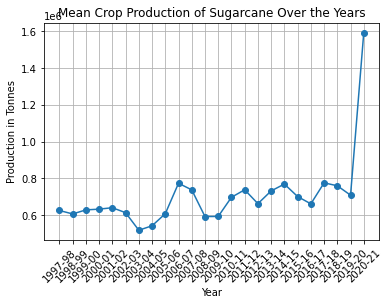

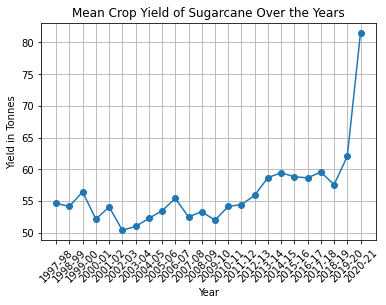

In [13]:
# let's see how has the moment of production of Sugarcane been over the years

sugarcane_data = rawdatav2[rawdatav2['Crop'] == 'Sugarcane']
sugarcane_prod_by_year = sugarcane_data.groupby('Year')['Production in Tonnes'].mean()

# Plotting the graph
mplpl.plot(sugarcane_prod_by_year.index, sugarcane_prod_by_year.values, marker='o')
mplpl.xlabel('Year')
mplpl.ylabel('Production in Tonnes')
mplpl.title('Mean Crop Production of Sugarcane Over the Years')
mplpl.xticks(rotation=45)
mplpl.grid(True)
mplpl.show()

sugarcane_yield_by_year = sugarcane_data.groupby('Year')['Yield'].mean()

# Plotting the graph
mplpl.plot(sugarcane_yield_by_year.index, sugarcane_yield_by_year.values, marker='o')
mplpl.xlabel('Year')
mplpl.ylabel('Yield in Tonnes')
mplpl.title('Mean Crop Yield of Sugarcane Over the Years')
mplpl.xticks(rotation=45)
mplpl.grid(True)
mplpl.show()

In [14]:
# Crop repeatation count - The total Top 10 Crops
rawdatav2["Crop"].value_counts().head(10)

Rice                 21611
Maize                20507
Moong(Green Gram)    15101
Urad                 14581
Sesamum              13049
Groundnut            12586
Wheat                11247
Rapeseed &Mustard    11034
Sugarcane            10942
Arhar/Tur            10895
Name: Crop, dtype: int64

In [24]:
# the crop is grown in majority of the states  
crop_states = rawdatav2.groupby('Crop')['State'].nunique().sort_values(ascending=False)
crop_statesv2 = crop_states.head(10)
crop_statesv2

Crop
Rice                   35
Maize                  33
Rapeseed &Mustard      32
Sugarcane              32
Other Rabi pulses      31
Wheat                  31
Urad                   31
Arhar/Tur              31
Other Kharif pulses    30
Sesamum                30
Name: State, dtype: int64

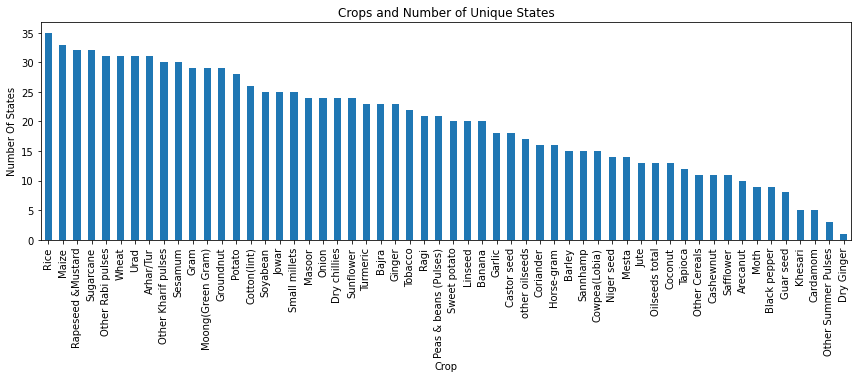

In [16]:
# Bar grapth to show data related to crop and unqiue states it is produced
crop_states.plot(kind='bar', stacked=False)
mplpl.xlabel('Crop')
mplpl.ylabel('Number Of States')
mplpl.title('Crops and Number of Unique States')

mplpl.subplots_adjust(right=2) #to adjust length of x-axis

mplpl.show()

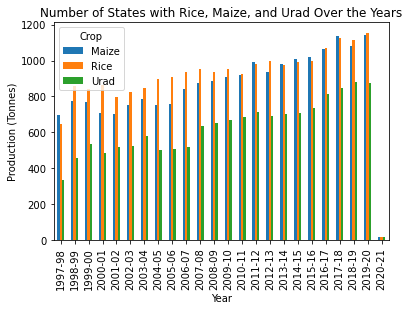

Crop,Maize,Rice,Urad
Year,,,
1997-98,694,647,336
1998-99,776,856,457
1999-00,768,843,533
2000-01,708,865,483
2001-02,700,795,518
2002-03,751,824,523
2003-04,784,848,580
2004-05,754,897,499
2005-06,758,911,506


In [17]:
 # Building a graph to see mean prouction in tonnes over the years through a clustered column graph

crops = ['Rice', 'Maize', 'Urad']
crop_data = rawdatav2[rawdatav2['Crop'].isin(crops)]  # Filtering data for selected crops

crop_production_by_year = crop_data.groupby(['Year', 'Crop']).size().unstack()

# Plotting the graph
crop_production_by_year.plot(kind='bar', stacked=False)
mplpl.xlabel('Year')
mplpl.ylabel('Production (Tonnes)')
mplpl.title('Number of States with Rice, Maize, and Urad Over the Years')
mplpl.legend(title='Crop')
# mplpl.grid(True)
mplpl.show()


crop_production_by_year.head(10)

In [18]:
# The mean production in tonnes of all the crops in all the states

production_matrix = rawdatav2.pivot_table(index = 'Crop', columns = 'State', values = 'Production in Tonnes', aggfunc = np.mean).round(0).fillna(0)

print("Mean Crop Production (in Tonnes) in States - Matrix :")
print("\n")
production_matrix.head(10) #reducing columns intentionally, remove head function to view the full data

Mean Crop Production (in Tonnes) in States - Matrix :




State,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman and Diu,Delhi,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Crop,,,,,,,,,,,,,,,,,,,,,
Arecanut,3102.0,481.0,0.0,2362.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.0,0.0,0.0,0.0,522.0,0.0,0.0,0.0,0.0,1483.0
Arhar/Tur,39.0,5827.0,44.0,191.0,1187.0,44.0,1268.0,1135.0,0.0,291.0,...,0.0,449.0,618.0,0.0,1449.0,5896.0,323.0,4738.0,176.0,240.0
Bajra,0.0,3282.0,0.0,0.0,311.0,0.0,8.0,0.0,487.0,3415.0,...,100.0,1028.0,112250.0,0.0,4249.0,661.0,0.0,22418.0,10.0,37.0
Banana,5828.0,130335.0,0.0,27485.0,12490.0,0.0,1238.0,534.0,0.0,0.0,...,2762.0,0.0,36.0,0.0,128322.0,4787.0,0.0,20616.0,0.0,0.0
Barley,0.0,0.0,0.0,0.0,620.0,0.0,317.0,0.0,0.0,165.0,...,0.0,6390.0,20825.0,247.0,0.0,0.0,0.0,6446.0,1976.0,477.0
Black pepper,35.0,4412.0,0.0,220.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0
Cardamom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,561.0
Cashewnut,80.0,3632.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,0.0,0.0,0.0,1281.0,369.0,0.0,0.0,0.0,0.0
Castor seed,0.0,4525.0,0.0,22.0,36.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,7472.0,0.0,167.0,1531.0,0.0,3.0,0.0,46.0


In [19]:
# A Crop Yield x Season Matrix can help us understand what's the best year for production of any crop.
season_matrix = rawdatav2.pivot_table(index = 'Crop', columns = 'Season', values = 'Production in Tonnes', aggfunc = np.mean).round(0).fillna(0)
season_matrix['Grand_Total'] = season_matrix.sum(axis = 1)

season_matrix = season_matrix.sort_values('Grand_Total', ascending = False ) 

print("Mean Crop Production (in Tonnes) in Seasons - Matrix :")
print("\n")
season_matrix.head(10) #reducing columns intentionally, remove head function to view the full data

Mean Crop Production (in Tonnes) in Seasons - Matrix :




Season,Autumn,Kharif,Rabi,Summer,Whole Year,Winter,Grand_Total
Crop,,,,,,,
Sugarcane,1223.0,1490942.0,3926.0,1514.0,562418.0,33012.0,2093035.0
Rice,22121.0,135342.0,98172.0,41757.0,35355.0,166583.0,499330.0
Oilseeds total,0.0,70611.0,271558.0,0.0,12559.0,0.0,354728.0
Wheat,0.0,10.0,185070.0,164.0,158311.0,1883.0,345438.0
Potato,278.0,6023.0,113997.0,7195.0,46988.0,22583.0,197064.0
Soyabean,64.0,42433.0,38.0,0.0,121114.0,50.0,163699.0
Banana,3951.0,6210.0,2298.0,23720.0,58902.0,1767.0,96848.0
Maize,9598.0,30156.0,20353.0,6155.0,25623.0,243.0,92128.0
Tapioca,489.0,5366.0,299.0,1692.0,70235.0,0.0,78081.0


In [20]:
# Let's see which state has the max production in Tonnes in 2003-04

def get_state_production(year):
    filtered_data = rawdatav2[rawdatav2['Year'].str.contains(year)]
    state_production = filtered_data.groupby('State')['Production in Tonnes'].sum().astype(int)
    state_production_sorted = state_production.sort_values(ascending=False)
    return state_production_sorted

sorted_state_production = get_state_production('2003-04')

sorted_state_production.head(3)

State
Uttar Pradesh     172597287
Maharashtra        44883082
Andhra Pradesh     33574252
Name: Production in Tonnes, dtype: int32

Enter the state name: Punjab
Enter the year: 2004-05


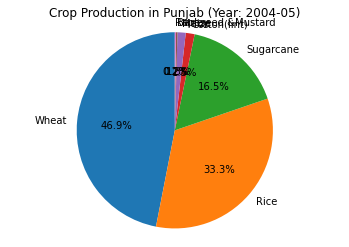

Enter the state name: Madhya Pradesh
Enter the year: 2006-07


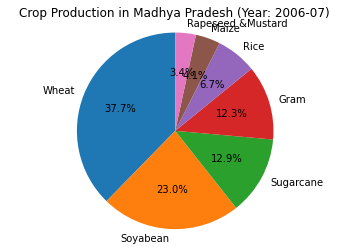

In [21]:
# We will build a Pi-chart of top 7 crops in terms of production volume in tonnes of user enetered state and year

class StateProductionChart:
    
    def create_pie_chart(state, year):
        filtered_data = rawdatav2[(rawdatav2['State'] == state) & (rawdatav2['Year'] == year)]
        group_data = filtered_data.groupby('Crop')['Production in Tonnes'].sum()
        top_5_crops = group_data.nlargest(7) #change number here to get more crops in pie-chart
        
        sizes = list(top_5_crops.values)
        labels = top_5_crops.index
        
        mplpl.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        mplpl.axis('equal')
        mplpl.title(f'Crop Production in {state} (Year: {year})')
        mplpl.show()

# multiple pie-charts

# Pie-Chart One
state_name = input("Enter the state name: ")
year = input("Enter the year: ")

StateProductionChart.create_pie_chart(state_name,year)

# Pie-Chart Two
state_name = input("Enter the state name: ")
year = input("Enter the year: ")

StateProductionChart.create_pie_chart(state_name,year)

# Summary
Data Analysis:We analyzed the data by examining crop yields, production values, crop distribution across states and 
    seasons, identifying top-producing crops, and determining the number of unique states in which crops are grown.